# Improved Integration of GRASS and Jupyter

As part of Google Summer of Code 2021, we've been working to shorten and simplify the launch of GRASS in Jupyter and imporve the map displays. You can find out more abou the project and follow the progress on the [GRASS wiki page](https://trac.osgeo.org/grass/wiki/GSoC/2021/JupyterAndGRASS).

This notebook is designed to run in binder and demonstrate the usage of `grass.jupyter`, the new module of Jupyter-specific functions for GRASS.

In [1]:
import os
import subprocess
import sys
from IPython.display import Image

In [2]:
gisbase = subprocess.check_output(["grass", "--config", "path"], text=True).strip()
os.environ['GISBASE'] = gisbase
sys.path.append(os.path.join(gisbase, "etc","python"))

In [3]:
import grass.script as gs
import grass.jupyter as gj

In [4]:
# Let's check our import by printing the __doc__ for init()
print(gj.init.__doc__)


    This function initiates a GRASS session and sets GRASS
    environment variables.

    Inputs:
        path - path to grass databases
        location - name of GRASS location
        mapset - name of mapset within location
    


In [5]:
# Start GRASS Session
gj.init("/home/grassdata", "nc_basic_spm_grass7", "user1")

# Set Display Settings
gj.display_settings(font="romans", driver="cairo") # Default font is "sans", let's change it to Romans just for fun!

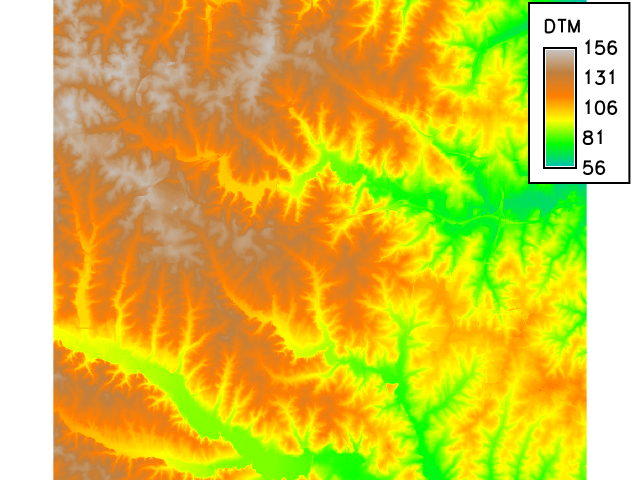

In [6]:
# Let's display the DTM of our sample area to ensure all's working

# Set computational region to the study area.
gs.parse_command('g.region', raster="elevation", flags='pg')

# Draw elevation (DTM) to get an overview of the area.
gs.run_command('r.colors', map="elevation", color="elevation")
gs.run_command('d.erase')
gs.run_command('d.rast', map="elevation")
gs.run_command('d.legend', raster="elevation", at=(65, 90, 85, 90), fontsize=15, flags="b", title="DTM")
Image(filename="map.png")